<center>
<h1>Complessità nei sistemi sociali</h1>
<h3>Laurea Magistrale in Fisica Dei Sistemi Complessi</h3> 
<h3>A.A. 2016/17</h3>
<h3>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h3>
<h2>Notebook 2 - Data import and network representation</h2>
</center>

Here, we play a bit with some network datasets.

We analyze the dataset 'cit-HepTh' available from the SNAP repository: http://snap.stanford.edu/data/index.html

There are several other repositories of network datasets, for instance:
- http://konect.uni-koblenz.de/
- http://www-personal.umich.edu/~mejn/netdata/
- http://networkrepository.com/
- http://cnets.indiana.edu/resources/data-repository/
- http://www.sociopatterns.org/datasets/

In [5]:
import sys, math

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Basic network import and representation

In [9]:
import collections as col

We use a dictionary that associates a key (node) to a list of nodes (neighbours)

In [10]:
links_out=col.defaultdict(list)
print links_out

defaultdict(<type 'list'>, {})


We open the file containing the network and read each line

In [11]:
fh=open('./cit-HepTh.txt','r')

In [13]:
s=fh.readlines()

In [14]:
s[0].strip()

'# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt'

In [15]:
for line in s:
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    t=line.strip().split()
    if t[0]!='#':
        #the first lines are comments
        origin=int(t[0])
        dest=int(t[1])
        links_out[origin].append(dest)
    
#close the file
fh.close()

How many nodes are in the network?

In [17]:
tot_nodes=len(nodes)
print tot_nodes

25059


In [18]:
for n in nodes:
    print n, nodes[n]

9306112 [9202065, 9210128]
9306114 [9204065, 9301122]
9306119 [9205084, 9205085]
9306122 [9201056, 9202021, 9204102, 9206084]
9306123 [9209021]
9306125 [9206016, 9209016, 9304154]
9306130 [9205066]
9306134 [9210134]
9306135 [9203038]
9306136 [9202047]
9306140 [9203021, 9205032]
9306141 [9202065, 9203060, 9210107, 9210120, 9211057]
9306146 [9202011, 9204094, 9206003, 9211053]
9306147 [9203038, 9206097, 9208059, 9209037, 9301122, 9303020, 9303136]
9306151 [9204011, 9206051]
9306153 [9201001, 9201003, 9201010, 9201013, 9203030, 9203043, 9204082, 9204093, 9206035, 9206090, 9210072, 9301004, 9303093, 9303100, 9303101, 9303127, 9303139, 9304011]
9306154 [9210013]
9306156 [9201078, 9205113, 9210049, 9210064, 9302071, 9302079, 9305093, 9305094]
9306162 [9202011, 9202039, 9203004, 9204020, 9205072, 9206032, 9301118]
9306163 [9207089, 9209120, 9301098]
9306164 [9207004]
9612003 [9203079, 9207103, 9305116, 9505128, 9603117, 9605046, 9611040]
9612075 [9309097, 9311042, 9311186, 9504090, 9504145]
9

2042 [1197, 1206, 9711200, 9802109, 9802150, 9806217, 9807226, 9906064, 9908116, 9909130, 9909134, 9909205, 9911043, 9911218, 9912012, 9912018, 9912135]
2043 [9210011, 9212038, 9308002, 9310201, 9312003, 9403045, 9403112, 9404059, 9412113, 9501004, 9503124, 9505012, 9506005, 9509015, 9510111, 9607003, 9607147, 9607224, 9608027, 9610043, 9701051, 9702102, 9705009, 9801169, 9804133, 9807024, 9808151, 9809119, 9902017]
2044 [9305123, 9306069, 9307168, 9308100, 9308139, 9409089, 9703078, 9711200, 9802109, 9802150, 9805114, 9806039, 9806214, 9901076, 9901079, 9902073, 9903228, 9905177, 9906022, 9908070, 9909013, 9911002]
2045 [9508153, 9606109, 9612196, 9904096]
2046 [1143, 9510017, 9510169, 9510209, 9511043, 9601038, 9608024, 9805019, 9910183, 9912086, 9912249, 9912279]
2047 [1112, 9204012, 9212049, 9403058, 9406132, 9503114, 9510209, 9602070, 9611213, 9612128, 9708049, 9806124, 9903212, 9906064, 9906126, 9906246]
2049 [9510221, 9703097, 9707253, 9710101, 9812059, 9901011, 9901086, 9907192

3120 [2154, 9407087, 9711200, 9802109, 9802150, 9905111, 9905178, 9905179, 9908140, 9910074, 9910243]
3121 [9601029, 9603081, 9610043, 9612146, 9803117, 9803265, 9804199, 9903165, 9908141, 9908153, 9909049, 9910001, 9910004, 9911041]
3122 [1084, 1201, 2117, 2211, 2237, 9402113, 9404008, 9510161, 9512077, 9602052, 9603194, 9604065, 9605033, 9607050, 9607201, 9608117, 9611050, 9611214, 9612120, 9701125, 9702201, 9711179, 9801182, 9802051, 9805019, 9805078, 9806155, 9808141, 9809100, 9809111, 9811237, 9812031, 9812135, 9902105, 9904207, 9905157, 9908105, 9908142, 9909062, 9909214, 9910053, 9911116, 9912249]
3123 [9609034, 9611024, 9711200, 9712239, 9802047, 9802109, 9802150, 9806236, 9811108, 9812005, 9905111, 9906149, 9907020, 9910096, 9910188]
3124 [1084, 2117, 2211, 2237, 3031, 3101, 3110, 9402113, 9404008, 9406125, 9503014, 9511194, 9604091, 9605088, 9703217, 9704006, 9805019, 9805170, 9806155, 9808141, 9809111, 9810188, 9811237, 9812031, 9812135, 9902105, 9903123, 9912249]
3125 [9411

9704100 [9312133, 9407142, 9411066, 9504136, 9610164]
9704101 [208020, 9503237, 9610148, 9611159, 9701137, 9703009]
9704102 [9202014, 9204046, 9503094, 9504139, 9504142, 9504147, 9509108, 9510190, 9511053]
9704104 [9201054, 9301042, 9403040, 9407087, 9408013, 9408099, 9411149, 9503086, 9503179, 9504113, 9505004, 9505006, 9505051, 9505088, 9506077, 9506148, 9509066, 9510017, 9510135, 9510222, 9602022, 9604198, 9605150, 9605199, 9606017, 9606139, 9607058, 9607207, 9608111, 9611050, 9611063, 9611201, 9611230, 9612052, 9612131, 9701015, 9702014, 9702154, 9702180, 9703051, 9703100, 9703110, 9703166, 9703172, 9703210, 9703215, 9704043, 9704044, 9704061]
9704105 [9612165]
9704107 [9306146, 9506157, 9511008, 9605219, 9606116]
9704108 [9302047, 9307010, 9404187, 9510205, 9605009, 9607110, 9609138]
9704109 [9201004, 9206084, 9207050, 9211025, 9308129, 9310170, 9404162, 9410167, 9501068, 9503124, 9507048, 9510017, 9510106, 9511077, 9602049, 9607070, 9607112, 9608061, 9609092, 9610043, 9610134, 96

6032 [9503124, 9602064, 9612121, 9705205, 9709025, 9712056, 9801118, 9801176]
6033 [2146, 2149, 3024, 5029, 5067, 9302099, 9311183, 9503030, 9503207, 9506014, 9509080, 9603097, 9701137, 9702093, 9703059, 9708040, 9711069, 9802183, 9804026, 9804092, 9805019, 9805170, 9806155, 9807011, 9807076, 9807213, 9810214, 9812118, 9812158, 9904069, 9904071, 9904092, 9904207, 9905006, 9905159, 9906234, 9907184, 9908023, 9908060, 9908064, 9908072, 9908130, 9909010, 9909172, 9910109, 9910228, 9911081, 9911190, 9912204, 9912218]
6034 [9703160, 9709227, 9710119, 9903111]
6035 [4027, 9206070, 9209012, 9209085, 9302080, 9305040, 9305125, 9306069, 9401081, 9412131, 9510109, 9601029, 9602043, 9603195, 9605008, 9606098, 9607155, 9704168, 9811246, 9812073, 9904143, 9910076, 9911091]
6036 [9804013, 9807024, 9902084, 9909006]
6037 [1041, 5250, 8211, 9302047, 9602052, 9607110, 9611050, 9709066, 9711200, 9802109, 9802150, 9806087, 9808079, 9811056, 9811126, 9902121, 9903203, 9903229, 9903238, 9905111, 9906127, 9

9707167 [9408134, 9511194, 9604156, 9612146]
9707168 [9605022, 9606132, 9608071]
9707169 [9706166, 9707101, 9712089]
9707170 [9309145, 9408134, 9601029, 9607235, 9612146, 9704204, 9705054, 9705078, 9705165, 9706151]
9707171 [9203079, 9207103, 9301019, 9305116, 9401027, 9505128, 9510133, 9602022, 9605046, 9610043, 9611040, 9611050, 9611137, 9612084, 9702155, 9704054, 9705010, 9706031, 9707002, 9707020, 9707048, 9707055, 9707082]
9707172 [9312133, 9407142, 9411066, 9504136, 9604145, 9610164, 9704100]
9707173 [9212145, 9310088, 9512128, 9610080, 9612005, 9612161, 9707127]
9707174 [9203026, 9204083, 9305010, 9305090, 9402063, 9411210, 9509151, 9511222, 9601179, 9605033, 9606082, 9608111, 9609071, 9609219, 9611042, 9703030, 9704167, 9705127, 9705138, 9707079, 9707093, 9707118]
9707175 [9303112, 9401036, 9407130, 9409139, 9602015]
9707176 [9211056, 9409060, 9412184, 9506131]
9707177 [9211076, 9705135]
9707178 [9603001]
9707179 [9402032, 9408074, 9501022, 9502057, 9510135, 9512223, 9603167, 9

9709086 [9503032, 9709133, 9709134]
9709087 [9507090, 9507115, 9510017, 9510097, 9510135, 9511043, 9511173, 9512031, 9512077, 9512078, 9512178, 9601177, 9602064, 9603087, 9604035, 9604091, 9604156, 9604166, 9604189, 9606139, 9608024, 9609212, 9610043, 9610125, 9611042, 9611047, 9611050, 9611164, 9611165, 9611202, 9611215, 9612087, 9612157, 9612223, 9701125, 9702099, 9702108, 9702163, 9703016, 9703030, 9703031, 9703039, 9703040, 9703077, 9703211, 9703217, 9704018, 9704029, 9704030, 9704080, 9704127, 9704134, 9704194, 9705040, 9705053, 9705054, 9705057, 9705091, 9705107, 9705110, 9705116, 9705120, 9705188, 9706013, 9706072, 9706196, 9707102, 9708022, 9708116, 9709065]
9709088 [9504006, 9609016, 9612203, 9706108, 9706169, 9706216]
9709089 [9503124, 9611042, 9701025, 9701138, 9702187, 9703016, 9703030, 9707146, 9707207, 9708080]
9709091 [9309145, 9411187, 9510017, 9511030, 9601029, 9601152, 9602052, 9602135, 9604042, 9604089, 9607235, 9610043, 9610250, 9611164, 9611202, 9612146, 9702076, 9

9711006 [9203031, 9309013, 9402020, 9403133, 9404094, 9406212, 9406213, 9407031, 9511043, 9512042, 9602052, 9603186, 9605097, 9605211, 9606054, 9608127, 9610024, 9611050, 9611064, 9701144, 9702018, 9702019, 9703141, 9704169, 9709054]
9711007 [9201020, 9203051, 9303156, 9304046, 9308129, 9312168, 9404162, 9501113, 9502141, 9502143, 9510220, 9603187, 9604123, 9607227, 9609092, 9609107, 9610148, 9611008, 9611159, 9611173, 9612080, 9701037, 9701127, 9701149, 9701166, 9702008, 9703127, 9705064, 9705093]
9711008 [9301038, 9306002, 9311165, 9412203, 9508099, 9510137, 9510199, 9510208, 9603030, 9605169, 9607218, 9608030, 9611050, 9611207]
9711009 [9601150, 9611159, 9611173, 9706094, 9708003, 9708078]
9711010 [9207060, 9512178, 9601003, 9607235, 9608024, 9610043, 9611047, 9611215, 9612087, 9612223, 9702108, 9703031, 9703039, 9704029, 9704089, 9704127, 9704197, 9705054, 9705091, 9705116, 9705120, 9705190, 9705221, 9706072, 9706196, 9707059, 9707102, 9707217, 9707250, 9708022, 9708037, 9709087, 9

4004 [3061, 3118, 9205021, 9207079, 9208070, 9211117, 9301052, 9307042, 9307104, 9308030, 9601029, 9702136, 9808138, 9906064, 9909205]
9310117 [9210141]
4006 [201211, 9510224, 9602160, 9609219, 9804124, 9805106, 9902205, 9905011]
9310119 [9203065, 9301056]
9310121 [9201026, 9211083]
4010 [4153, 9604128, 9607174, 9609128, 9610128, 9611004, 9612011, 9612013, 9709216, 9801168, 9803091, 9904206, 9908032]
4011 [1213, 2086, 2198, 9611174, 9702076, 9705221, 9711163, 9711165, 9711200, 9802042, 9904142, 9905111, 9907166, 9908134, 9908142, 9909215, 9910019, 9910092, 9911057, 9911119, 9911137, 9911169, 9911183, 9911193, 9912288]
9310125 [9202057, 9206049, 9302023]
9310126 [9201004, 9207050, 9207060, 9208035]
9310131 [9201078, 9202007, 9205113, 9210049, 9302071, 9305093]
9310133 [9211102, 9301046]
4022 [1033, 2130, 3076, 9906064, 9907209, 9908047, 9910081, 9912182, 9912186]
9310135 [9210021]
4024 [2236, 3007, 3099, 9711162, 9803031, 9903077, 9908142, 9912075]
9607113 [9305026, 9403040, 9407031, 95

9603200 [9212021, 9212145, 9509023, 9512022]
9603201 [9507079, 9509060, 9511073, 9603135]
9603204 [9407007, 9412165, 9501012, 9505016, 9511221, 9512112]
9603205 [9212009, 9401153, 9402015, 9406094, 9409019]
9603206 [9402044, 9403198, 9407087, 9408013, 9408074, 9408099, 9408155, 9411149, 9503163, 9503186, 9504080, 9507013, 9508002, 9509066, 9509165]
9210006 [9201007, 9204031]
9210012 [9204046, 9206055, 9209055, 9209070]
9210017 [9201061, 9202004]
9210019 [9209063]
9210029 [9203062]
9210032 [9202074]
9210033 [9202022, 9202054, 9202063, 9203079]
9210036 [9203056]
9903265 [9207087, 9411028, 9703136]
9210047 [9202003, 9207103]
9210050 [9201015, 9201029, 9201040, 9202087, 9204024, 9204046, 9612197]
9210061 [9201019]
9210066 [9201013, 9203028, 9206060, 9208065, 9209041, 9210037]
9210072 [9201013]
9210075 [9204089]
9210079 [9205037, 9206006, 9206048]
9210080 [9203062, 9204019, 9207013, 9210029]
9210081 [9207117]
9210082 [9207117]
9210085 [9201054]
9210088 [9201061]
9210090 [9201040]
9210101 [9

9607057 [208020, 9409188, 9503124, 9503208, 9505162, 9507027, 9508144, 9510209, 9512196, 9512219, 9601036, 9601038, 9602010, 9602022, 9602030, 9602114, 9602144, 9603003, 9603113, 9603150, 9603161, 9604030, 9604070, 9604129, 9604133, 9604164, 9604178, 9605047, 9605049, 9605150, 9605184, 9605200, 9606044, 9606122, 9606148, 9606165, 9606176, 9607019, 9607041]
9607058 [9301042, 9304135, 9407087, 9408099, 9411149, 9411183, 9511030, 9512006, 9512043, 9603042, 9603167, 9604062, 9605032]
9607059 [9206056, 9503024]
9607060 [9511154, 9601023]
9607062 [9202035, 9203056, 9303014, 9310156, 9312003, 9403045, 9505161, 9606134]
9607064 [9210010, 9304056, 9312043, 9401154, 9404050, 9406020, 9408113, 9411051, 9412054, 9412108, 9412199, 9504052, 9510242]
9607065 [9207114, 9401105, 9407022, 9407078, 9407182, 9502066, 9502100, 9504066, 9504067, 9504130, 9509133, 9509173]
9607066 [9407087, 9408099, 9503115, 9603073, 9603136, 9604051, 9604059]
9607067 [9402002, 9402032, 9407087, 9408099, 9410167, 9503124, 95

303267 [104005, 104035, 104179, 109068, 109082, 210076, 210184, 302110, 303114]
303268 [206255, 207106, 208048, 210281, 211017, 211069, 211100, 211123, 211170, 211189, 211254, 211261, 211291, 212069, 212079, 212082, 212095, 212225, 212274, 301006, 302150, 303001, 303008, 303032, 303065, 303104, 303207, 9203009, 9203030, 9204082, 9208044, 9208053, 9302014, 9506193]
303269 [1212, 5212, 105032, 105203, 105204, 106274, 107166, 111025, 112147, 202124, 202148, 203019, 203163, 204074, 207119, 207156, 207278, 208019, 210292, 302222, 9601038, 9602030, 9604129, 9604156, 9606139, 9606169, 9608167, 9704006, 9803141, 9804026, 9805157, 9805170, 9809147, 9810188, 9904207]
303270 [3025, 5090, 7012, 8038, 103183, 104173, 206183, 212081, 9512062, 9512219, 9604055, 9606118, 9609122, 9610234, 9611099, 9701166, 9705092, 9706197, 9803205, 9805112, 9805141, 9806226, 9809162, 9810188, 9911138]
9610001 [9405188, 9507135, 9601115, 9603004, 9603074, 9606135]
9610002 [9510157, 9602155, 9607134]
9610003 [9204036, 

9612219 [9206103, 9507076, 9510060, 9511207, 9609105]
9612220 [9504140, 9507048, 9512082, 9609086]
9612221 [9212103, 9407087, 9408099, 9509092, 9512013, 9604142, 9605233, 9610069, 9611230, 9612096]
9612222 [9610043, 9610236, 9611072, 9611164, 9611202, 9611215, 9612087, 9612115, 9612126, 9612144, 9612157, 9612162]
9612223 [9209032, 9403040, 9410167, 9503124, 9510017, 9510135, 9511043, 9511194, 9512077, 9603081, 9603127, 9604091, 9604156, 9606139, 9608024, 9610043, 9610125, 9610236, 9611042, 9611103, 9611164, 9611174, 9611202, 9611215, 9612087, 9612126, 9612144, 9612157, 9612162]
9612224 [9205081, 9210127, 9211056, 9403179, 9406216, 9508042, 9511162, 9512012, 9601150, 9604052, 9604058, 9604127, 9605082, 9607027, 9608173, 9608195, 9609048, 9609087, 9610107, 9610166, 9610238, 9610252, 9611079, 9611134, 9611204]
9510048 [9305133, 9311017]
9612226 [9601142]
9612228 [9409193, 9412185, 9501077, 9501142, 9503093, 9503180, 9601082, 9603053, 9604169, 9605001, 9605129, 9606001, 9610114, 9612149]
9

9504086 [9305004, 9409113, 9504020]
9504088 [9307062, 9412072]
9504089 [9202081, 9207096, 9301017, 9302014, 9302057, 9307063, 9402083]
9504090 [9201059, 9309097, 9309152, 9407087]
9504091 [9305109, 9309115, 9402156, 9409168, 9411028]
9504092 [9305172, 9307174, 9312114]
9504093 [9201021, 9201061, 9203050, 9203054, 9203056, 9204072, 9205089, 9206044, 9207034, 9207095, 9208015, 9211135, 9212136, 9301106, 9302026, 9304068, 9308020, 9308034, 9309106, 9311181, 9403045, 9404171, 9405072]
9504094 [9302133, 9307045, 9310098, 9312047, 9312118, 9401096, 9406207, 9412120, 9412212, 9501135, 9503134]
9504095 [9205081, 9211056, 9302038, 9303171, 9307049, 9405124, 9410073, 9410167, 9501030, 9501068, 9503124, 9503237, 9504027, 9504047]
9504096 [9206075, 9303076, 9304156, 9404069]
9504097 [9208059]
9504098 [9211021, 9212049, 9302120, 9304048, 9309016, 9310073, 9312115, 9405026, 9406029]
9504099 [9310170, 9311139, 9311157, 9312187, 9402042, 9402118, 9403150, 9405144, 9407052]
9504101 [9204089, 9305130]
9

9508025 [9211111]
9508026 [9211097, 9312104, 9407018, 9407134, 9502029, 9503017, 9505122, 9506084]
9508027 [9206033, 9302061, 9302062, 9305054, 9401006]
9508029 [9202014, 9203033, 9203083, 9204046, 9305025, 9308023, 9406216, 9408084]
9508030 [9204095, 9210010, 9211040, 9212113, 9302027, 9302060, 9307037, 9307176, 9307189, 9407152, 9408033]
9508031 [9309055, 9404187, 9411177, 9505077]
9508032 [9402046]
9508033 [9409096, 9409184, 9410206, 9506006]
9508034 [9301103, 9302050, 9304025, 9403143, 9405112, 9502030, 9502031, 9505009, 9505014, 9505156]
9508036 [9202018, 9203040, 9210110, 9211104, 9305156]
9508037 [9405177]
9508038 [9502097]
9508039 [9203070, 9307013, 9307049, 9410052, 9411091, 9412032, 9504124, 9507121]
9508040 [9212010, 9212015, 9212019, 9212021, 9212145, 9303050, 9307091, 9307180, 9310056]
9508041 [9205031, 9212154]
9508042 [9212029, 9301035, 9306052, 9412184, 9501068]
9508043 [9407087, 9408099, 9411048, 9411057, 9503012, 9503163, 9504102, 9505062, 9505075, 9505100, 9505150, 9

9903053 [9301042, 9308083, 9308122, 9311049, 9402119, 9406055, 9411048, 9508155, 9512121, 9603161, 9606040, 9607139, 9608079, 9609239, 9610162, 9612085, 9701023, 9701162, 9705237, 9706110, 9707149, 9711013, 9802168, 9809187, 9812127]
9903054 [9206048, 9510123, 9601029, 9602043, 9602051, 9605234, 9609052, 9610172, 9612051, 9702015, 9703216, 9704005, 9704156, 9704172, 9706100, 9708099, 9711138, 9711200, 9802109, 9802150, 9803080, 9803227, 9804019, 9804095, 9805014, 9805050, 9805171, 9901076, 9901079, 9902052]
9903055 [9606100, 9612091, 9803011, 9903011]
9903056 [9206032, 9207094, 9211119, 9301042, 9304026, 9304135, 9306072, 9408119, 9507012, 9511164, 9603167, 9704151, 9707158, 9707214, 9801134, 9801171, 9802183, 9803015, 9803076, 9805023, 9805139, 9806238, 9807082, 9808149, 9810132, 9811183, 9811201, 9811258, 9812110, 9901018]
9903057 [9504081, 9506126, 9510086, 9601077, 9601150, 9607011, 9707246, 9708031, 9711014, 9802190, 9806106, 9807135]
9903058 [9204099, 9307168, 9310194, 9401070, 9

205221 [1138, 3075, 4102, 8015, 8016, 9019, 10102, 10206, 107119, 111222, 201253, 202021, 202150, 204045, 204148, 205033, 205048, 205089, 205090, 9303046, 9305010, 9403195, 9411210, 9412110, 9509151, 9711200, 9802109, 9802150, 9806074, 9810226, 9811047, 9811131, 9812067, 9905111, 9907088, 9912007, 9912123]
205222 [1113, 2040, 2226, 3300, 4014, 4057, 6251, 8079, 8087, 9172, 10112, 11006, 11153, 104118, 106041, 106131, 107108, 107233, 108156, 112047, 204235, 9405029, 9906064, 9909134, 9909199, 9910093, 9910132, 9911015, 9912060]
205223 [109201, 9907001, 9908099]
205224 [205224]
205226 [9312079]
205227 [5209, 10252, 11241, 12052, 103171, 104102, 106109, 106113, 106184, 106191, 106247, 107134, 108119, 109057, 109213, 110007, 110062, 110087, 110108, 110123, 110167, 110169, 110226, 110234, 110265, 111008, 111085, 111093, 111217, 112122, 112218, 112223, 112253, 201004, 201158, 201189, 202008, 202127, 202142, 203083, 203099, 203113, 203119, 203198, 203235, 204091, 204110, 204129, 9711200, 9802

207237 [9205089, 9206070, 9209012, 9304148, 9312017, 9412138, 9501071]
207238 [106235, 107081, 204089, 208020, 9401139, 9509080, 9702093, 9807161, 9811035, 9906055, 9909072]
207239 [6061, 107109, 202169]
207240 [201253, 203132, 9808163]
207241 [1204, 9210, 101235, 103058, 106015, 108182, 111290, 202021, 204051, 204226, 205160, 9803001, 9803002, 9805129, 9809188, 9904149, 9904191, 9905111]
207242 [8010, 103063, 103083, 104191, 112262, 9707190, 9711162, 9806198, 9903254, 9908142, 9912238]
207243 [5136, 6144, 9026, 103198, 103255, 108192, 109067, 109096, 201096, 203115, 204121, 206026, 206209, 207002, 207101, 207212, 9609141, 9611193, 9812153, 9908028, 9910188]
207244 [5186, 7170, 7191, 8142, 10207, 11023, 11089, 11256, 103115, 103155, 105225, 106040, 107177, 108226, 108245, 109025, 110028, 110115, 110171, 111198, 201227, 202125, 202126, 203092, 203124, 203217, 204064, 206213, 9301042, 9301043, 9501068, 9504090, 9504145, 9507158, 9512219, 9606017, 9606122, 9609122, 9703100, 9703110, 98032

9909008 [9303177, 9910073]
9909009 [9407137, 9504153, 9504154, 9811111]
9909010 [208020, 9302099, 9311183, 9503207, 9506014, 9509080, 9603097, 9702093, 9707148, 9707160, 9708040, 9711201, 9712028, 9803141, 9804026, 9807011, 9810214, 9811035, 9904069, 9906055, 9906234, 9907054, 9907184, 9908064]
9909011 [9511068, 9601039, 9605158, 9712181, 9802154, 9905109]
9909012 [9408073, 9708097, 9711173, 9803073, 9809142]
9909013 [9409089, 9711200, 9802109, 9802150, 9803001, 9803002, 9805041, 9805114, 9808016, 9808017, 9809188, 9901076, 9901079, 9902121, 9903203, 9903228, 9906226]
9909014 [9903044]
9909015 [9301042, 9311055, 9408099, 9503163, 9603042, 9606136, 9607058, 9608111, 9612128, 9706089, 9706109, 9706141, 9707192, 9710222, 9711116, 9802033, 9802067, 9803142, 9806056, 9807166, 9901032, 9902134, 9905196, 9905217, 9906243, 9907206, 9910050]
9909017 [9304011, 9510017, 9511164, 9512042, 9512145, 9601029, 9604055, 9604091, 9704089, 9705221, 9711200, 9712186, 9808149, 9810132, 9812237, 9904142, 99

9911055 [9906064, 9909130, 9909205, 9910219, 9911043]
9911056 [9406160, 9804142]
9911057 [9301052, 9401139, 9404071, 9604042, 9703217, 9711162, 9711165, 9711200, 9802042, 9803166, 9805034, 9805114, 9806099, 9807198, 9808128, 9809061, 9810116, 9810219, 9810224, 9811159, 9901077, 9907008, 9907166, 9908019, 9908134, 9908141, 9908142, 9910091, 9911041]
9911058 [9205040, 9212143, 9507057]
9911060 [9711200, 9806087, 9808079, 9812032, 9902121, 9903203, 9903238, 9906127, 9910040, 9910113, 9910124, 9910267]
9911061 [9510157, 9602155, 9610002, 9705087, 9804132, 9907078, 9907159]
9911062 [9204099, 9503089, 9505037, 9510181, 9511188, 9605114, 9610008, 9611169, 9706170, 9712251, 9810245, 9910105]
9911063 [9502157, 9606105, 9809069, 9903266, 9904136]
9911064 [9204024, 9610131, 9704157, 9705105, 9705193, 9708110, 9909061]
9911065 [9611050, 9701125, 9708147, 9709027, 9711097, 9711205, 9802175, 9804180, 9807169, 9807197, 9810070, 9812094, 9901073, 9902081, 9904065, 9904186, 9905223, 9906164, 9906244, 9

9409180 [9301100, 9304120, 9310171, 9310189]
103071 [1159, 1192, 1197, 1206, 2091, 3237, 6046, 7002, 7064, 7120, 8231, 9103, 9148, 9711200, 9802109, 9802150, 9806087, 9809057, 9902121, 9906064, 9909058, 9909134, 9910202]
9409184 [9211047]
9409185 [9211007, 9312005, 9409041]
9409186 [9207067, 9209037, 9211040, 9212117, 9301099, 9302110, 9303051, 9306134, 9309125, 9312013, 9312185]
103076 [2108, 9608006, 9709151]
9409189 [9309112, 9311090, 9406204, 9407157]
103078 [1192, 2145, 3052, 4097, 5127, 7064, 8140, 8160, 9244, 10127, 10252, 11115, 101003, 101073, 101083, 101100, 101164, 102032, 102035, 102042, 102113, 102138, 102184, 9711200, 9802109, 9802150, 9806039, 9902088, 9902173, 9904120, 9905177, 9905221, 9906064]
9409191 [9302023, 9406192]
9409193 [9209044, 9302008, 9401099]
103086 [9234, 10076, 10292, 11239, 102006, 9302103, 9307158, 9309140, 9403198, 9407087, 9408099, 9411048, 9411057, 9502072, 9504006, 9504034, 9505097, 9506035, 9507090, 9508072, 9509141, 9510129, 9510183, 9511064, 95

9406195 [9210011, 9212038, 9306075, 9308078]
9406196 [9402070]
9406197 [9201067]
9406198 [9201019, 9201045, 9205099, 9206016, 9206082, 9207053, 9207060, 9208055, 9209016, 9210061, 9212037, 9303057, 9303171, 9304104, 9304154, 9304159, 9305069, 9305142, 9305185, 9306052, 9306125, 9307049, 9307050, 9310035, 9311120]
9406200 [9401149]
9406201 [9303048, 9309145, 9401070, 9401072, 9401125, 9401159, 9405117]
9406203 [9205117, 9207019, 9207072, 9208069, 9209029, 9210010, 9210040, 9210117, 9210118, 9211130, 9212104, 9301040, 9302006, 9302124, 9304125, 9307031, 9307106, 9307170, 9307190, 9312045, 9312049, 9404113, 9405093, 9405121]
9406204 [9304147]
9406205 [9205103, 9206029, 9211093, 9302090, 9305176, 9311096, 9311112, 9401127, 9402070, 9404068]
9406206 [9210021, 9302033, 9303016, 9304155, 9308112, 9308154, 9309039, 9401147, 9403155, 9403191, 9406082]
9406207 [9207097, 9211064, 9301038, 9302133, 9307045, 9312047, 9312118, 9312158, 9312175, 9401096, 9403122]
9406209 [9210079, 9303048, 9308139, 9

102208 [12141, 9312059, 9405110, 9502010]
102209 [102079, 9211053, 9306044, 9308057, 9703190, 9707091, 9805185, 9909153]
102210 [1197, 2091, 3300, 4014, 4133, 4166, 6203, 6251, 10071, 11254, 12033, 9612128, 9906064, 9907209, 9910132, 9910219, 9911015]
102211 [8154, 8170, 10281, 102197, 9211119, 9301042, 9403123, 9409188, 9507121, 9510209, 9612126, 9711165, 9807235, 9909120]
102212 [6160, 7011, 7030, 101102, 9505175, 9507074, 9510083, 9710153, 9801195, 9811169, 9908040, 9908142, 9910053, 9910129, 9912050, 9912072]
9607137 [9505080, 9605221]
9607138 [9410206, 9505080, 9508033, 9512155, 9602032, 9605221]
301027 [11287, 108170, 212292, 9501068, 9705212, 9808079, 9906064, 9910245]
301028 [103030, 105095, 108174, 108207, 112054, 204062, 204103, 205265, 209239, 210306, 212159, 9506011, 9508143, 9510135, 9711130, 9808128]
301029 [8125, 104146, 107185, 110109, 204117, 9510200, 9603194, 9611214, 9805078, 9903210, 9908105, 9911161]
9607142 [9311074, 9406215, 9507087]
9607143 [9607103]
301032 [416

104266 [7169, 8221, 9612128, 9706089, 9706109, 9707192, 9907197]
104267 [2015, 11096, 102124, 9405029, 9507132, 9706012, 9910254]
9804001 [9304114, 9402098, 9404093, 9404159, 9407193, 9501092, 9508003, 9509002, 9509034, 9603053, 9605001, 9608003, 9702194, 9711162]
9804002 [9303098, 9701087]
9804003 [9307108, 9308007, 9410143, 9501004, 9503062, 9702081]
9804004 [9710147, 9802105]
9804005 [9407128, 9407194, 9507043, 9507114, 9609131, 9706103]
9804006 [9307049, 9510169, 9511079, 9602052, 9608111, 9609070, 9609071, 9611014, 9702198, 9704005, 9710247, 9711098, 9711138, 9711161, 9711200, 9712073, 9712239, 9801076, 9801206, 9802047, 9802109, 9802116, 9802126, 9802150, 9802183, 9802195, 9802203, 9803001, 9803002, 9803013, 9803015, 9803028, 9803039, 9803051, 9803053, 9803060, 9803061, 9803068, 9803076, 9803077, 9803085, 9803090, 9803103, 9803109, 9803111, 9803119, 9803131, 9803135, 9803137, 9803138, 9803167, 9803171, 9803174, 9803193, 9803196, 9803214, 9803220, 9803231]
9804007 [9402032, 940809

9411214 [9210013, 9302078, 9303028, 9310128]
9411215 [9401079, 9403111]
9411216 [9306023, 9312164]
105105 [3005, 7138, 104080, 104219, 9409089]
105106 [3037, 4141, 5148, 5244, 6117, 7100, 10170, 102178, 104082, 9510161, 9512077, 9604156, 9611230, 9705074, 9705084, 9705130, 9710218, 9801135, 9810092, 9903081, 9912177]
9411220 [9201058, 9212068, 9401002, 9403146]
9411221 [9203077, 9207067, 9209037, 9211040, 9211107, 9211109, 9302048, 9302086, 9303133]
9411222 [9205068]
105111 [2091, 9126, 11127, 103146, 104010, 104071, 9301052, 9404071, 9709091, 9710217, 9802042, 9808016, 9809033, 9809061, 9909205, 9911043]
105112 [6035, 101194, 9202075, 9204099, 9904143, 9905007, 9908150, 9909056]
105114 [2043, 9205092, 9512099, 9701080, 9702134, 9704088, 9711092, 9901097, 9908112]
105115 [2117, 2223, 2237, 3031, 3160, 4159, 5006, 6071, 7153, 7226, 8013, 8053, 8101, 8203, 8252, 9103, 9105, 9148, 10021, 10028, 10034, 10058, 10060, 10101, 10108, 10190, 10218, 11094, 11238, 12092, 12198, 12210, 101200, 102

9608156 [9404173, 9606061, 9608064]
302045 [1017, 3252, 207100, 9609035, 9610193, 9704073, 9811077]
9608158 [9406007, 9504113]
302050 [106113, 112218, 203198, 205227, 208167, 209113, 209159, 209231, 210058, 211006]
9608164 [9512115]
9608165 [9212106, 9212127, 9304011]
9608166 [9510185, 9604165]
302055 [7015, 7074, 203038, 206007, 9605001, 9606001, 9908142]
9608168 [9209044, 9304005, 9402046, 9402047, 9402048, 9405022, 9512215, 9602146, 9603045, 9607069]
302057 [208024, 9604112, 9711200, 9802109, 9802150, 9802183, 9803076, 9803249, 9812012, 9812117, 9902168, 9903226, 9905042]
9608170 [9211030, 9306069, 9502074, 9509129, 9606106]
302059 [10049, 102185, 107177, 108245, 109025, 109152, 109159, 111274, 112113, 112117, 201062, 204249, 207020, 210132, 9203078, 9203080, 9203081, 9206076, 9207042, 9410167, 9502009, 9503124, 9610043, 9612121, 9612182, 9703214, 9705138, 9706148, 9712004, 9802107, 9807199, 9810042]
302060 [110242, 111135, 112044, 201081, 202021, 202109, 203028, 203231, 203257, 204

110087 [7146, 102077, 103171, 106113, 9711200, 9802042, 9802109, 9802150, 9806119, 9806146, 9807216, 9810169, 9901147, 9904017, 9906022, 9906064, 9910117, 9911082]
110088 [1113, 2021, 3052, 4022, 4097, 7001, 8133, 9064, 9065, 9091, 10215, 12036, 12044, 102174, 9603142, 9809147, 9906064, 9907209, 9909130, 9910093, 9911055]
110089 [7018, 106109, 106179, 109010, 109168, 109213, 110007, 110072, 110271, 203019]
110090 [7176, 101029, 102044, 103013, 105127, 106016, 106048, 106136, 9908142]
110091 [104170, 105261, 108178, 9511194, 9801054, 9809124]
110092 [9103, 10218, 104042, 104061, 105245, 106244, 110002, 9208027, 9303143, 9311177, 9701125, 9801127, 9908105]
110093 [1027, 2075, 4013, 7186, 8013, 8205, 9181, 11125, 12183, 102076, 104133, 106048, 109162, 9608024, 9610043, 9711078, 9711162, 9711165, 9712185, 9904095, 9908141, 9908142, 9910004, 9912072, 9912167]
110094 [2052, 2223, 8231, 9061, 12081, 103226, 106103, 9805170, 9810072, 9812219, 9901080, 9901159, 9902105, 9904207, 9906161, 990814

9811166 [9602171, 9612112]
9811167 [9204099, 9211056, 9308124, 9402073, 9403155, 9502065, 9504148, 9507112, 9508058, 9509108, 9510034, 9602135, 9602179, 9605043, 9605051, 9607235, 9608079, 9609126, 9702076, 9703040, 9704005, 9706192, 9708005, 9711138, 9711200, 9802042, 9802109, 9802150, 9803001, 9803002, 9805028, 9805104, 9806021, 9806095, 9807225, 9808020, 9808038, 9808088, 9808117, 9808146, 9809032, 9809055, 9810186, 9810195, 9811120, 9811156, 9811167]
9811168 [9507158, 9510209, 9511222, 9602070, 9603142, 9603161, 9701162, 9802202, 9803224, 9803235, 9806051, 9808101]
9811169 [9510083, 9602115, 9603071, 9605003, 9611058, 9701078, 9801195]
9811170 [9503124, 9504108, 9506160, 9506194, 9510169, 9511043, 9608024, 9610043, 9610082, 9611042, 9612162, 9701025, 9701122, 9701139, 9701142, 9702187, 9703030, 9703218, 9704041, 9704080, 9704158, 9705055, 9705185, 9709220, 9710009, 9801182, 9803058, 9804200, 9805047, 9805126, 9806115]
9811171 [9609035, 9610193, 9705176, 9807069, 9808129, 9811077]
9

9610161 [9311073, 9409076]
304050 [112182, 302225]
9610163 [9203023, 9311055, 9409111, 9502107, 9506101, 9506147, 9507063, 9510153, 9512117, 9605066]
9610164 [9312133, 9407142, 9411066, 9504136]
9610165 [9309073]
304056 [1033, 2091, 3237, 5016, 106113, 108068, 202037, 204122, 209066, 211268, 212023, 303125, 9405020, 9906064, 9911055]
9610170 [9202014, 9205027, 9309075, 9312172, 9401131, 9404006, 9410073, 9411198, 9502038, 9504090, 9506106, 9507022, 9507090, 9507160, 9508058, 9508068, 9511115, 9512012, 9512031, 9512089, 9512153, 9512154, 9601029, 9602067, 9602136, 9605085, 9607102]
9610171 [9209058, 9312030, 9409021, 9510017, 9510134, 9511064, 9512031, 9601029, 9602043, 9602051, 9602052, 9603100, 9603109, 9604035, 9604134, 9605091, 9605224, 9606113, 9607235, 9609084]
304060 [5179, 8084, 8140, 12052, 101076, 103171, 105113, 106113, 106151, 106184, 106191, 106247, 107067, 107091, 107134, 107169, 108119, 108172, 109057, 110007, 110031, 110061, 110062, 110087, 110108, 110123, 110169, 110234

We calculate the out-degree distribution of the network.

In [19]:
degree={}

for i in nodes:

    deg=len(nodes[i])

    if deg in degree:
        degree[deg]+=1
    else:
        degree[deg]=1

In [20]:
print degree.keys()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 112, 115, 120, 121, 122, 123, 124, 125, 126, 134, 135, 136, 139, 142, 143, 146, 149, 154, 156, 157, 158, 159, 160, 165, 167, 169, 170, 175, 177, 180, 181, 198, 200, 201, 207, 211, 212, 214, 216, 226, 246, 263, 274, 289, 562, 302, 359]


We export the degree distribution to an output file.

In [21]:
s_deg=sorted(degree.keys())

In [22]:
fout=open('./degree_out_distri.dat','w')
for d in s_deg:
    deg_freq=float(degree[d])/tot_nodes 
    fout.write(str(d)+'  '+str(deg_freq)+'\n')
fout.close()

In [23]:
for i in degree.iteritems():
    print i

(1, 2449)
(2, 1951)
(3, 1657)
(4, 1405)
(5, 1272)
(6, 1172)
(7, 1087)
(8, 975)
(9, 847)
(10, 790)
(11, 771)
(12, 651)
(13, 640)
(14, 622)
(15, 556)
(16, 519)
(17, 503)
(18, 498)
(19, 429)
(20, 412)
(21, 398)
(22, 384)
(23, 339)
(24, 304)
(25, 333)
(26, 284)
(27, 250)
(28, 244)
(29, 246)
(30, 240)
(31, 184)
(32, 194)
(33, 160)
(34, 166)
(35, 162)
(36, 149)
(37, 135)
(38, 111)
(39, 114)
(40, 104)
(41, 98)
(42, 91)
(43, 81)
(44, 77)
(45, 61)
(46, 55)
(47, 60)
(48, 51)
(49, 48)
(50, 45)
(51, 45)
(52, 39)
(53, 32)
(54, 34)
(55, 37)
(56, 31)
(57, 33)
(58, 35)
(59, 23)
(60, 14)
(61, 10)
(62, 16)
(63, 23)
(64, 17)
(65, 17)
(66, 15)
(67, 14)
(68, 10)
(69, 13)
(70, 14)
(71, 13)
(72, 6)
(73, 11)
(74, 7)
(75, 8)
(76, 4)
(77, 8)
(78, 7)
(79, 6)
(80, 5)
(81, 5)
(82, 5)
(83, 6)
(84, 4)
(85, 3)
(86, 5)
(87, 1)
(88, 3)
(89, 4)
(90, 5)
(91, 2)
(92, 1)
(93, 4)
(94, 1)
(95, 3)
(96, 3)
(97, 2)
(98, 1)
(99, 4)
(100, 1)
(101, 2)
(102, 1)
(103, 1)
(104, 4)
(106, 4)
(107, 1)
(108, 2)
(109, 2)
(112, 1)
(115, 2)

In [24]:
from operator import itemgetter

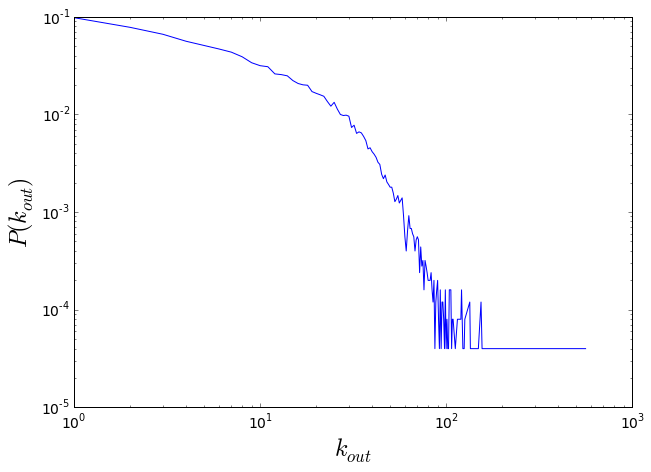

In [28]:
x=[]
y=[]
for i in sorted(degree.iteritems(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1])/tot_nodes)

plt.figure(figsize=(10,7))   
plt.plot(x,y)
plt.xlabel('$k_{out}$', fontsize=24)
plt.ylabel('$P(k_{out})$', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.show()

Let's have a look at the degree-in distribution.

In [29]:
links_in=col.defaultdict(list)

fh=open('./cit-HepTh.txt','r')
#reading all the file lines
for line in fh.readlines():
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s=line.strip().split()
    if s[0]!='#':
        #the first lines are comments
        origin=int(s[0])
        dest=int(s[1])
        links_in[dest].append(origin)
    
#chiudo il file
fh.close()

In [30]:
degree_in=col.defaultdict(int)
for i in links_in.keys():
    deg=len(links_in[i])
    degree_in[deg]+=1

tot_nodes_in=len(links_in)
print tot_nodes_in

23180


What is the difference from an exponential distribution?

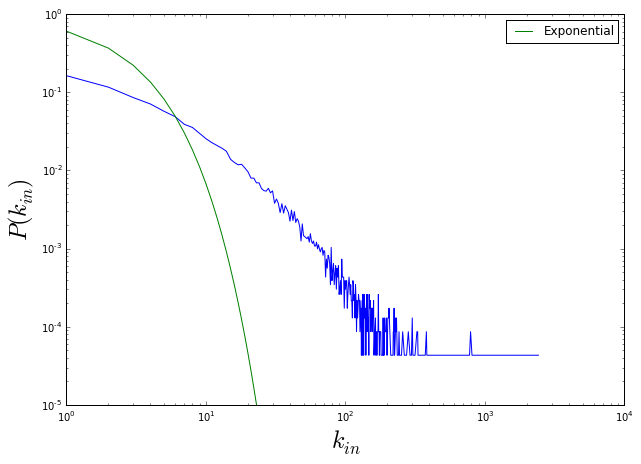

In [33]:
def f(t):
    return np.exp(-0.5*t)

x=[]
y=[]
for i in sorted(degree_in.iteritems(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1])/tot_nodes_in)

plt.figure(figsize=(10,7))   
    
plt.plot(np.array(x),np.array(y))
plt.plot(np.array(x), f(np.array(x)), label='Exponential')
plt.xlabel('$k_{in}$', fontsize=24)
plt.ylabel('$P(k_{in})$', fontsize=24)
plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1])
plt.legend()
plt.show()